# 準備

In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ1A/"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/JKJ1A
csv/  data/  graph/  LICENSE  model/  notebook/  README.md  src/


# 敵対サンプルとは

敵対サンプルとは，学習したモデルを騙すようなデータサンプルのことである．敵対サンプルによりモデル
を騙すことを攻撃という.


# 敵対サンプルへの防衛

敵対サンプルからの攻撃に対して効果的な防御方法を考える.その一例として敵対的訓練 (Adversarial
training) がある．これはモデルの訓練時に敵対サンプルを生成して，それらを正しく分類できるように学習させるというものだ.

## 課題１

実験課題1, 2をFGSMでなくPGDで行え．
- PGDでATしたモデルは，FGSMの時と同様，`model_cifar10_pgd0.010.pth`の様にして保存せよ．今後の便利のため，`alpha`, `n_iter`の値はファイル名に含めない．
- `advtrain_cifar10.py`を修正する形で行え．つまり以下のような感じで敵対的サンプルの生成方法を切り替えられるようにせよ（`set_args()`の中を修正することになる）．
```
!python advtrain_cifar10.py --attack_method 'fgsm'
!python advtrain_cifar10.py --attack_method 'pgd'
```
- `pgd`には`fgsm`でも用いた`eps`に加え二つ追加のパラメータがある．それぞれ，`alpha`, `n_iter`として，これも`set_args()`を修正することで，以下のようにできるようにせよ．
```
!python advtrain_cifar10.py --attack_method 'pgd' --eps 0.01, --alpha 0.002 --n_iter 7
```

補足：
PGDでのadversarial trainingは非常に遅い．またFGSM，PGDに関わらずadversarial trainingは通常よりも多めのepoch数での学習が必要になる．もし実行が難しいようなら，PGDの代わりにFastFGSMによるadversarial trainingをしても良い．FastFGSMはほとんどFGSMと同じだが，もともとの画像xに対して攻撃するのではなく，xを少しノイズで動かしたものにFGSMを行う．ノイズは`[-eps, eps]`の範囲の一様分布がよい．例えば`torch.rand_like`が利用できる．

```python
x              # 元の画像
x = x + noise  # ノイズを加える
output = model(x)  #以降はFGSMと同じ
```

[Wong+'20](https://openreview.net/forum?id=BJx040EFvH): FastFGSMの元ネタ

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/JKJ1A/src/ex2/2_1')  # src/にあるコードを利用できるようにする

In [ ]:
!python src/ex2/2_1/advtrain_cifar10.py --eps 0.01 --attack_method 'pgd' --save_model_name 'model/model_cifar10_pgd0.010.pth'

using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
[epoch  1] loss: 1.671
[epoch  2] loss: 1.321
[epoch  3] loss: 1.150
[epoch  4] loss: 1.016
[epoch  5] loss: 0.905
[epoch  6] loss: 0.798
[epoch  7] loss: 0.694
[epoch  8] loss: 0.606
[epoch  9] loss: 0.518
[epoch 10] loss: 0.434
Training completed
train acc = 0.875
 test acc = 0.590
train acc = 0.862
 test acc = 0.575


In [ ]:
!python src/ex2/2_1/advtrain_cifar10.py --eps 0.001 --attack_method 'pgd' --save_model_name 'model/model_cifar10_pgd0.001.pth'

using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
[epoch  1] loss: 1.299
[epoch  2] loss: 0.837
[epoch  3] loss: 0.642
[epoch  4] loss: 0.511
[epoch  5] loss: 0.395
[epoch  6] loss: 0.307
[epoch  7] loss: 0.232
[epoch  8] loss: 0.181
[epoch  9] loss: 0.131
[epoch 10] loss: 0.107
Training completed
train acc = 0.940
 test acc = 0.753
train acc = 0.940
 test acc = 0.752


In [ ]:
!python src/ex2/2_1/advtrain_cifar10.py --eps 0.005 --attack_method 'pgd' --save_model_name 'model/model_cifar10_pgd0.005.pth'

using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
[epoch  1] loss: 1.502
[epoch  2] loss: 1.109
[epoch  3] loss: 0.911
[epoch  4] loss: 0.767
[epoch  5] loss: 0.648
[epoch  6] loss: 0.538
[epoch  7] loss: 0.447
[epoch  8] loss: 0.369
[epoch  9] loss: 0.298
[epoch 10] loss: 0.233
Training completed
train acc = 0.902
 test acc = 0.635


In [ ]:
!python src/ex2/2_1/advtrain_cifar10.py --eps 0 --attack_method 'pgd' --save_model_name 'model/model_cifar10_pgd0.pth'

using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
[epoch  1] loss: 1.217
[epoch  2] loss: 0.759
[epoch  3] loss: 0.566
[epoch  4] loss: 0.432
[epoch  5] loss: 0.324
[epoch  6] loss: 0.256
[epoch  7] loss: 0.185
[epoch  8] loss: 0.136
[epoch  9] loss: 0.105
[epoch 10] loss: 0.086
Training completed
train acc = 0.966
 test acc = 0.794


## 課題２

これまで説明した敵対的サンプルの生成方法（例えばFGSM）では，「正しいラベルでの誤差が大きくなるように」画像を変化させ敵対的サンプルを生成した．これはUntargetedな方法（例えばUntargeted FGSM）と呼ばれる．この場合，敵対的サンプルがどの誤ったラベルになるかは事前にわからない．これに対してTargetedな方法は，「指定した誤ったラベルでの誤差が小さくなるように」画像を変化させる．Untargetedな方法が実装できていれば，ほんの少し修正すればTargetedな方法に修正できる．Targeted FGSM, Targeted PGDを実装し，`adversarial_attack.py`に追加せよ．Targetedな方法でいくつか敵対的サンプルを生成し，うまくいっていることを確認せよ（練習問題１の様な感じで）．授業ページの背景知識にある「敵対的サンプル入門」が参考になると思う．

In [ ]:
import sys
import torch
sys.path.append('/content/drive/MyDrive/Colab Notebooks/JKJ1A/src/ex2/2_1')  # src/にあるコードを利用できるようにする

from adversarial_show import cmp_images
from adversarial_attack import targeted_fgsm, targeted_pgd
from cifar10 import load_data
from vgg import VGG as Net

Files already downloaded and verified
Files already downloaded and verified


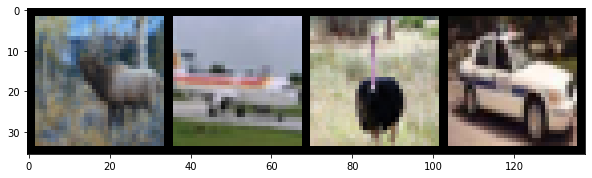

 deer airplane  bird automobile


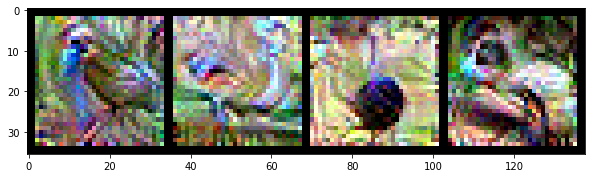

 bird  bird  bird  bird


In [ ]:

#今回はこのモデルを持ってくる
PATH = './model/model_cifar10_fgsm0.001.pth'
net = Net('VGG11')                   # 空のネットワークを準備
net.eval()                           # 評価モードにする
state_dict = torch.load(PATH)        # 保存したパラメタをロード
net.load_state_dict(state_dict)      # ネットワークにパラメタをセット

#ミニバッチの大きさは16．つまり，データセットが16ある．
trainloader, testloader, classes = load_data(16)

#イプシロン
epsilon = 1

# ミニバッチを一つ取得
itr = iter(trainloader)
images, labels = next(itr)

adv_images = targeted_pgd(net, images, labels, epsilon, 0.01, 100)
n_show = 4
cmp_images(net, images, labels, adv_images, classes, n_show)

Files already downloaded and verified
Files already downloaded and verified


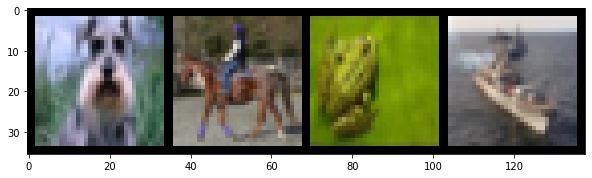

  dog horse  bird  ship


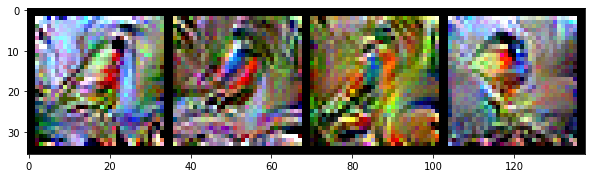

 bird  bird  bird  bird


In [ ]:
#今回はこのモデルを持ってくる
PATH = './model/model_cifar10_fgsm0.005.pth'
net = Net('VGG11')                   # 空のネットワークを準備
net.eval()                           # 評価モードにする
state_dict = torch.load(PATH)        # 保存したパラメタをロード
net.load_state_dict(state_dict)      # ネットワークにパラメタをセット

#ミニバッチの大きさは16．つまり，データセットが16ある．
trainloader, testloader, classes = load_data(16)

#イプシロン
epsilon = 1

# ミニバッチを一つ取得
itr = iter(trainloader)
images, labels = next(itr)

adv_images = targeted_pgd(net, images, labels, epsilon, 0.01, 100)
n_show = 4
cmp_images(net, images, labels, adv_images, classes, n_show)

## 課題3


Adversarial attackは「人間の目には見えないほど小さな変化で分類器を騙す」というものである．この「人間の目には見えないほど」という制限を無くしたらどのようになるだろうか？

攻撃強度`epsilon`の制限を極端にゆるくした敵対的サンプルを生成し画像として表示し，その様子を観察せよ．`image`と`adv_image`の画像の間でどの様な変化が起きているだろうか？それぞれの画像に対しネットワークが出力した分類結果（クラス名）も並べて観察せよ（Day2 練習問題1の`cmp_images()`が参考になる）．通常の学習をしたモデル，adversarial trainingをしたモデルそれぞれについて同様に制限の緩い敵対的サンプルを生成し，その違いについても議論せよ．どのような変化が出るかはここでは言わないが，**単に「めちゃくちゃ」になるのではなく興味深い変化が観察されるはず**．課題2のTargetedな生成方法だと変化の傾向がわかりやすいかもしれない．

ここでの敵対的サンプル生成は，PGDで`epsilon=1.0`, `alpha=0.01`, `n_iter=100`あたりが良い．学習したモデルによるので，適宜修正が必要．極端にゆるくしてもだめで，少し調整する必要がある．TargetedとUntargetedでも異なる．

注意１：モデルを学習する必要はなく，学習ずみのいくつかのモデルに対してPGD攻撃をすることになる．

注意２：期待されるような敵対的画像が生成されない人が多い．次の点をよく確認してほしい．(i) LeNetではなくちゃんとVGGで学習しているか，(ii) 学習はしっかり行われているか（攻撃を受けてない画像の分類精度は十分高いか），(iii) PGDによる攻撃のパラメタ設定は適切か．



Files already downloaded and verified
Files already downloaded and verified


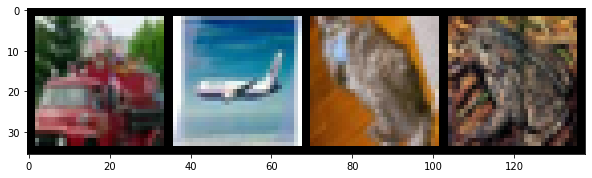

truck airplane   cat  frog


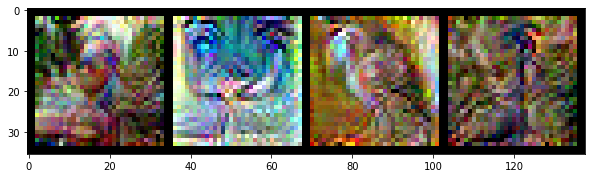

 bird  bird  bird  bird


In [ ]:
#今回はこのモデルを持ってくる
PATH = './model/model_cifar10_fgsm0.010.pth'
net = Net('VGG11')                   # 空のネットワークを準備
net.eval()                           # 評価モードにする
state_dict = torch.load(PATH)        # 保存したパラメタをロード
net.load_state_dict(state_dict)      # ネットワークにパラメタをセット

#ミニバッチの大きさは16．つまり，データセットが16ある．
trainloader, testloader, classes = load_data(16)

#イプシロン
epsilon = 1

# ミニバッチを一つ取得
itr = iter(trainloader)
images, labels = next(itr)

adv_images = targeted_pgd(net, images, labels, epsilon, 0.01, 100)
n_show = 4
cmp_images(net, images, labels, adv_images, classes, n_show)

Files already downloaded and verified
Files already downloaded and verified


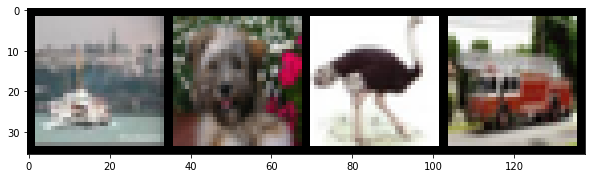

 ship   dog  bird truck


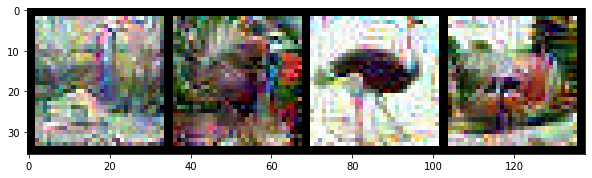

 bird  bird  bird  bird


In [ ]:
#今回はこのモデルを持ってくる
PATH = './model/model_cifar10.pth'
net = Net('VGG11')                   # 空のネットワークを準備
net.eval()                           # 評価モードにする
state_dict = torch.load(PATH)        # 保存したパラメタをロード
net.load_state_dict(state_dict)      # ネットワークにパラメタをセット

#ミニバッチの大きさは16．つまり，データセットが16ある．
trainloader, testloader, classes = load_data(16)

#イプシロン
epsilon = 1

# ミニバッチを一つ取得
itr = iter(trainloader)
images, labels = next(itr)

adv_images = targeted_pgd(net, images, labels, epsilon, 0.01, 100)
n_show = 4
cmp_images(net, images, labels, adv_images, classes, n_show)